In [26]:
import pandas as pd

In [27]:
df = pd.read_excel("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/Pengamatan.ods",
                   sheet_name="pengamatan")

In [28]:
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4
135,2025-08-07,D,1,8.0,8.0,8.0,8.0
33,2025-08-09,F,4,17.9,17.5,17.8,16.5
112,2025-08-11,B,2,38.5,33.6,35.5,34.1
72,2025-08-10,D,1,37.4,34.9,40.1,35.4
127,2025-08-07,B,3,8.0,8.0,8.0,8.0


In [29]:
df_with_diameter = df
df_with_diameter["diameter"] = df_with_diameter[["diameter_1", "diameter_2", "diameter_3", "diameter_4"]].mean(axis=1)

In [30]:
df_with_diameter

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4,diameter
0,2025-08-08,A,1,8.9,8.8,9.0,9.1,8.950
1,2025-08-08,A,2,11.6,12.0,12.6,11.9,12.025
2,2025-08-08,A,3,10.9,10.0,9.4,10.8,10.275
3,2025-08-08,A,4,9.6,10.0,10.2,10.6,10.100
4,2025-08-08,A,5,10.4,11.6,9.8,10.9,10.675
...,...,...,...,...,...,...,...,...
145,2025-08-07,F,1,8.0,8.0,8.0,8.0,8.000
146,2025-08-07,F,2,8.0,8.0,8.0,8.0,8.000
147,2025-08-07,F,3,8.0,8.0,8.0,8.0,8.000
148,2025-08-07,F,4,8.0,8.0,8.0,8.0,8.000


In [31]:
df_clean = df_with_diameter.groupby(by=["tanggal", "p"]).agg({
    "diameter": "mean"
}).reset_index()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

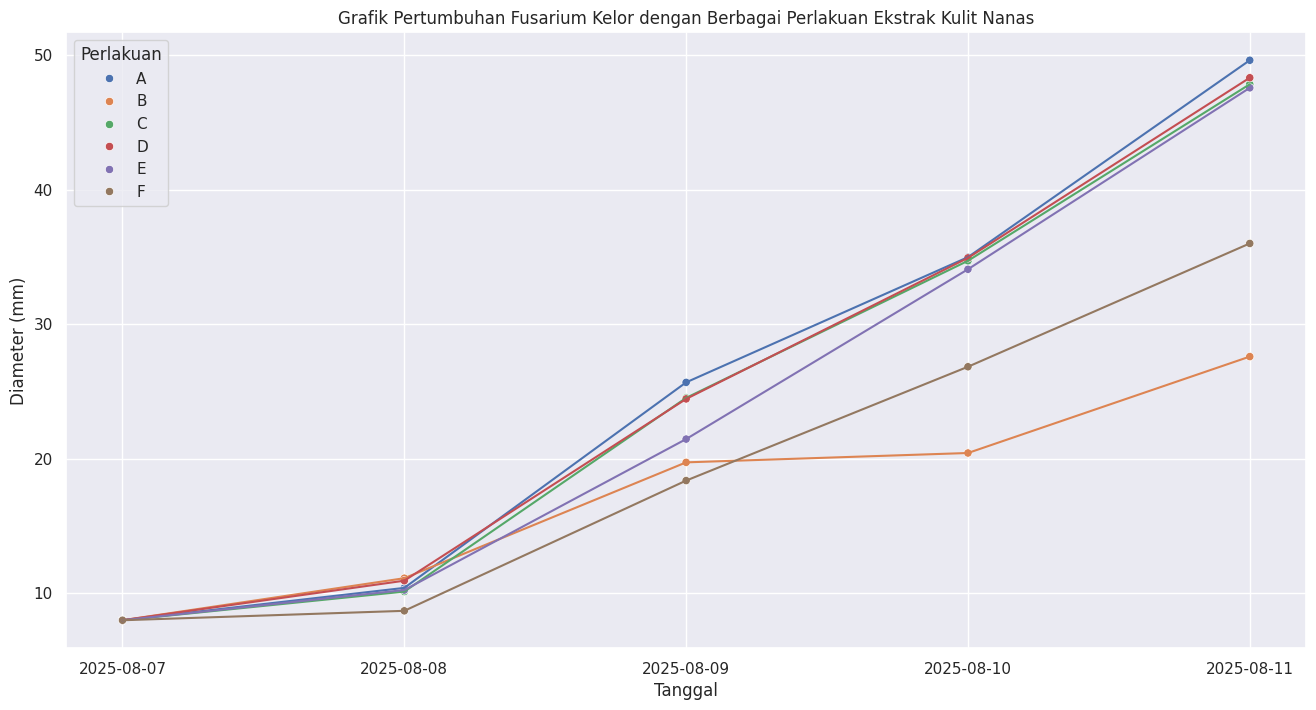

In [34]:
plt.figure(figsize=(16, 8))

sns.set_theme("notebook")

sns.lineplot(data=df_clean,
             x="tanggal",
             y="diameter",
             hue="p",
             legend=None)

sns.scatterplot(data=df_clean,
                x="tanggal",
                y="diameter",
                hue="p")

plt.title("Grafik Pertumbuhan Fusarium Kelor dengan Berbagai Perlakuan Ekstrak Kulit Nanas")

plt.ylabel("Diameter (mm)")

plt.xlabel("Tanggal")

plt.legend(title="Perlakuan")

plt.xticks(ticks=df_clean["tanggal"].unique())

plt.show()